<a href="https://colab.research.google.com/github/Jeongmin0658/kentech_tutorial/blob/main/Monte%20Carlo%20simulation/2023_summer_CCP/contributors/hansu/2D_Ising1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class Ising2D:

    def __init__(self, size, temperature, coupling): #초기설정
        self.size = size #초기 사이즈 설정
        self.temperature = temperature #온도 설정
        self.coupling = coupling #상호작용정도 설정하는 상수(양수)
        self.lattice = np.random.choice([1, -1], size=(size, size)) #격자 사이즈 만들기 행력 크기를 size*size로 정하고 각 위치의 값에 +1,-1을 넣음

        # save initial state
        self.magnetization = [np.sum(self.lattice) / (self.size ** 2)] #전체 자기장/전체 스핀의 개수 = 평균 자기장
        self.snapshots = [self.lattice.copy()] #그 차례에서의 lattice 상태를 저장함

    def energy(self):
        return -self.coupling * np.sum(self.lattice * (np.roll(self.lattice, 1, axis=0) + np.roll(self.lattice, 1, axis=1))) #전체 에너지값 구하는 식

    def propose_flip(self):
        x, y = np.random.randint(0, self.size, 2) #격자 내 속하는 랜덤 정수 2개 생성(위치가 될 거임)
        energy_change = 2 * self.coupling * self.lattice[x, y] * (self.lattice[(x+1)%self.size, y] + self.lattice[x, (y+1)%self.size]
                                                  + self.lattice[(x-1)%self.size, y] + self.lattice[x, (y-1)%self.size]) #변화가 음수면 좋음
        return x, y, energy_change

    def accept_flip(self, x, y, energy_change):
        if np.random.random() < np.exp(-energy_change / self.temperature):  #0이상 1이하 값 하나 만들고 그것보다 크면 변경
            self.lattice[x, y] *= -1 #온도가 낮을수록 바꿀 확률이 큼

    def monte_carlo_step(self, step_now=0):
        """
        Perform one Monte Carlo step, i.e., propose and carry out a spin flip for each spin on average
        """
        # Propose a move
        for _ in range(self.size ** 2): # lattice 전체 칸에 대해 반복
            x, y, energy_change = self.propose_flip() # propose a single flip
            self.accept_flip(x, y, energy_change) # Check acceptance of the move
            #바꾸며 변경하며 계속 함

        # 각각 시행했을 때 magnetization - Track total sum of spins, normalized
        self.magnetization.append(np.sum(self.lattice) / (self.size ** 2))

In [9]:
def plot_evolution(system, snapshot_interval):
    """
    Plot the evolution of the Ising model, showing both the state of the lattice and the total magnetization
    """
    fig = plt.figure(figsize=(2*len(system.snapshots), 5))  #새 도표를 만드는데, 그 사이즈는 width, height임
    grid = plt.GridSpec(2, len(system.snapshots), hspace=0.2, wspace=0.2)

    # Plot lattice snapshots
    for i, snapshot in enumerate(system.snapshots):
        ax = fig.add_subplot(grid[0, i])
        ax.imshow(snapshot, cmap='gray')
        ax.set_title(f"Step {i * snapshot_interval}")
        if i != 0: #i 가 0이 아닐 때
            ax.get_yaxis().set_visible(False)  # Removes the y-axis for snapshots that are not the leftmost

    # Plot magnetization
    ax2 = fig.add_subplot(grid[1, :])
    ax2.plot(system.magnetization)
    ax2.set_ylim(-1.1, 1.1)
    #ax2.set_title('Total Sum of Spins vs. MC Step')
    ax2.set_xlabel('MC Step * total number of spins')
    ax2.set_ylabel('Normalized total magnetization')
    ax2.grid(True)

    # Draw markers and arrows on magnetization plot
    snapshot_steps = [i*snapshot_interval for i in range(len(system.snapshots))]
    ax2.plot(snapshot_steps, [system.magnetization[i] for i in snapshot_steps], 'ro')  # Plot markers

#     # Add arrows
#     for step in snapshot_steps:
#         ax2.annotate("", xy=(step, system.magnetization[step]), xytext=(step, -0.2),
#                     arrowprops=dict(arrowstyle="->"))

    plt.show()


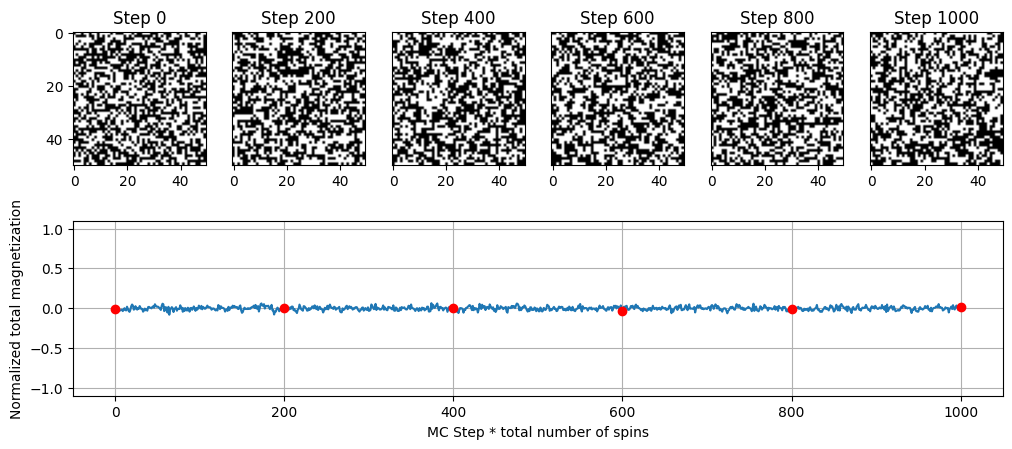

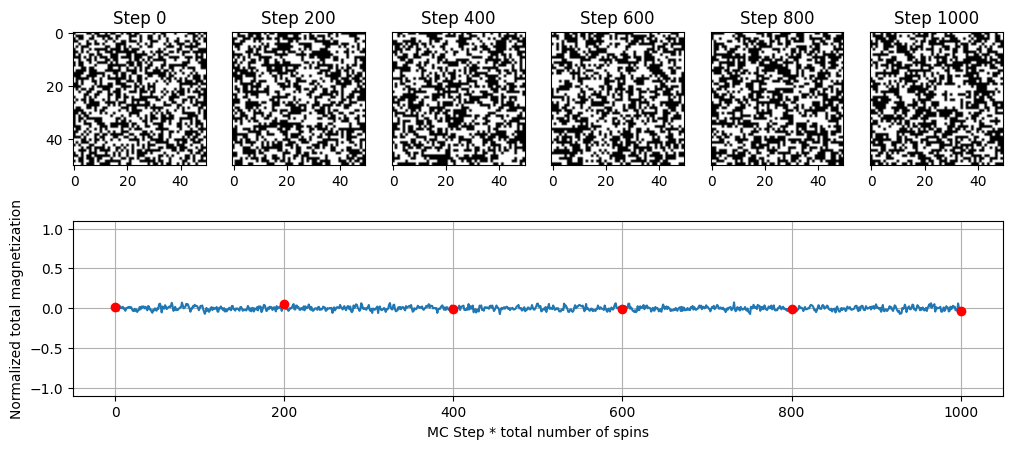

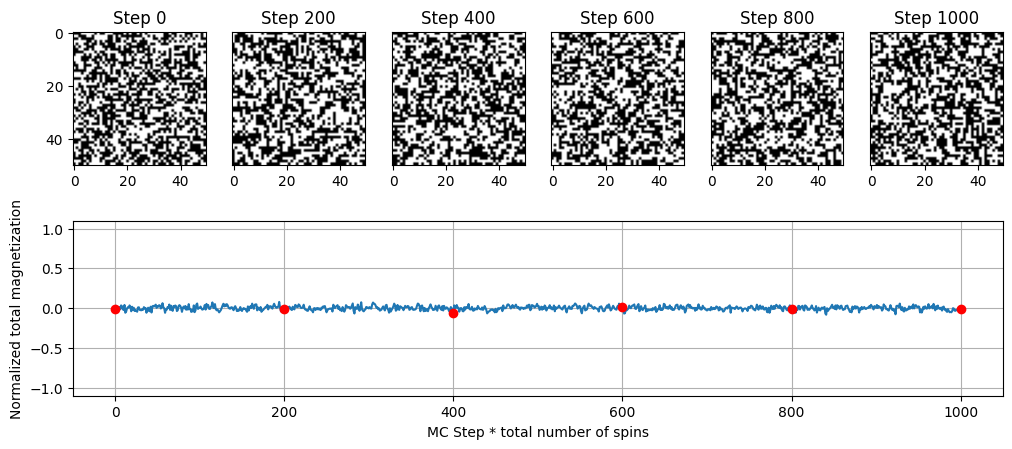

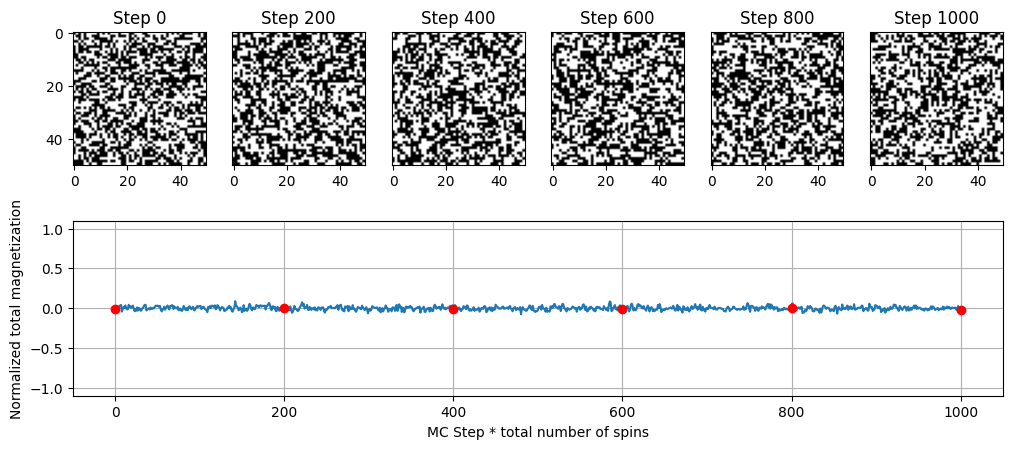

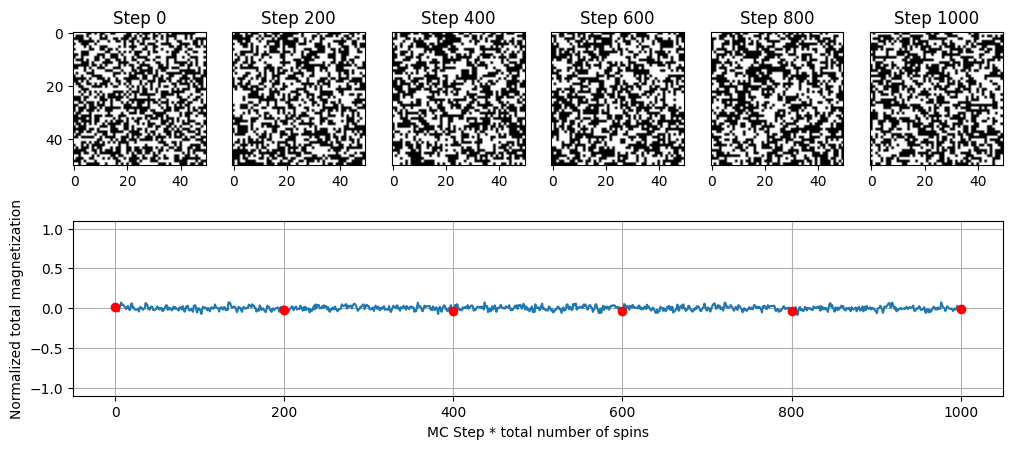

In [10]:
# Create an Ising system
size = 50
coupling = 1.0
num_steps = 1000 # 총 실행 횟수
snapshot_interval = num_steps // 5  # 간격 설정(정수)

# 온도설정:온도가 켈빈인가?
temperature = 10.0

# 똑같은 조건으로 5번 시행할거야
several=5
for _ in range(several):
    # Run the Monte Carlo simulation
    system = Ising2D(size, temperature, coupling)
    for step in range(num_steps):
        system.monte_carlo_step()
        if step % snapshot_interval == 0:
            system.snapshots.append(system.lattice.copy())
    # Plot the result
    plot_evolution(system, snapshot_interval)

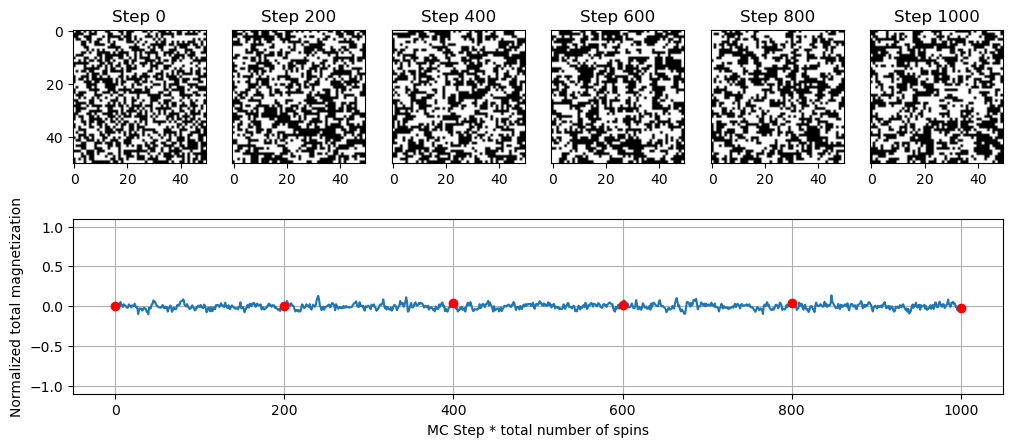

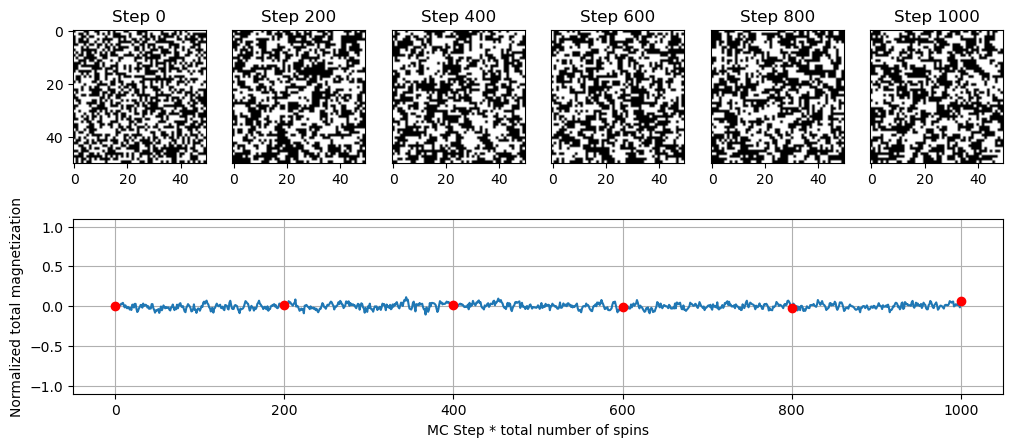

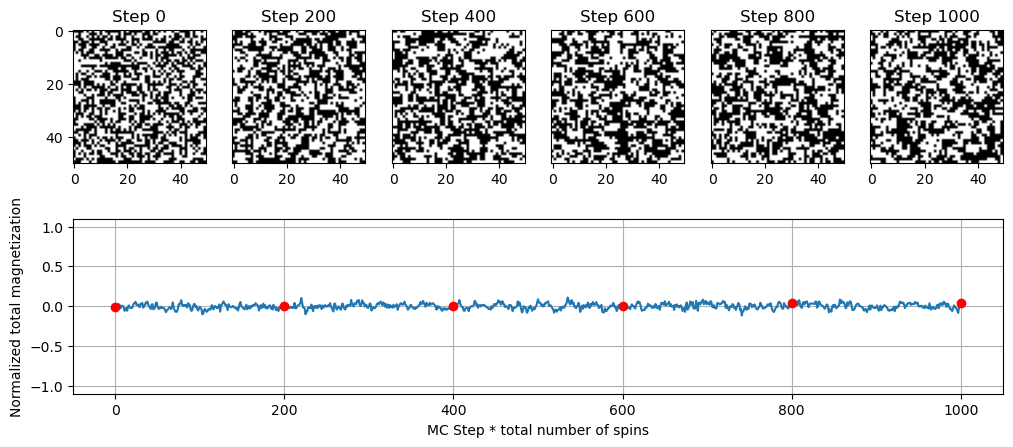

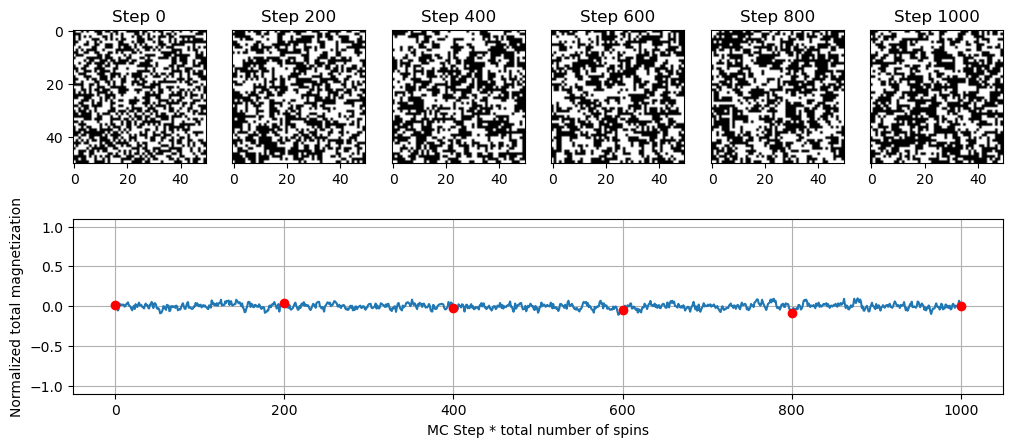

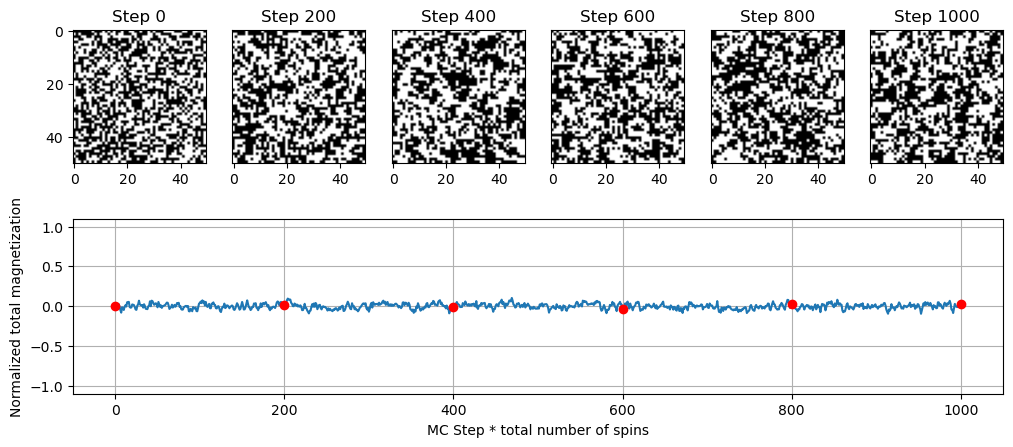

In [ ]:
# Control variable
temperature = 5.0

# Independent runs
several=5
for _ in range(several):
    # Run the Monte Carlo simulation
    system = Ising2D(size, temperature, coupling)
    for step in range(num_steps):
        system.monte_carlo_step()
        if step % snapshot_interval == 0:
            system.snapshots.append(system.lattice.copy())
    # Plot the result
    plot_evolution(system, snapshot_interval)

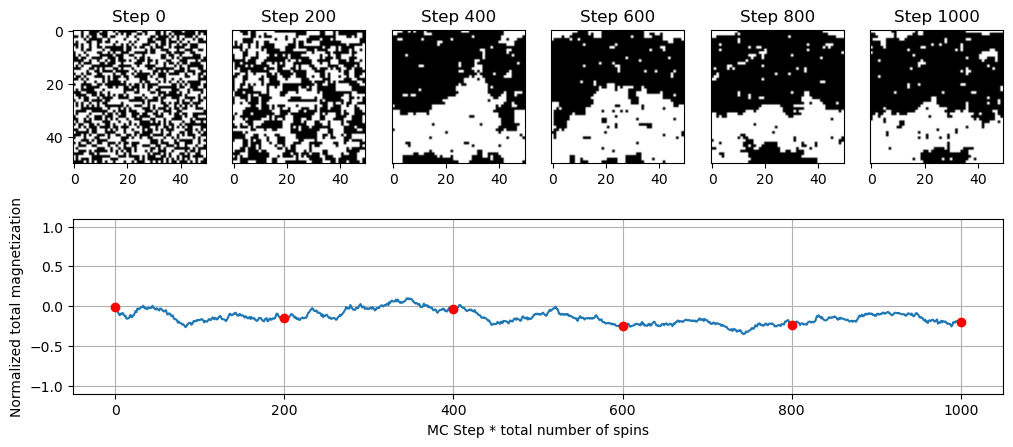

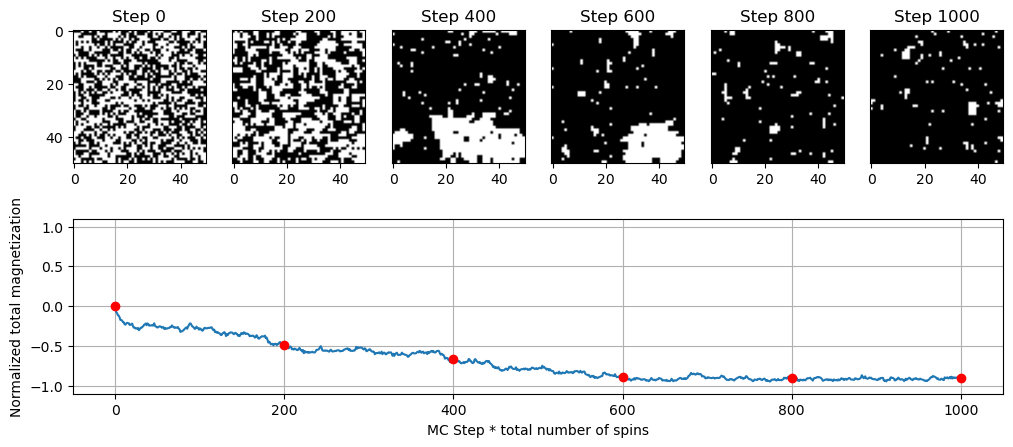

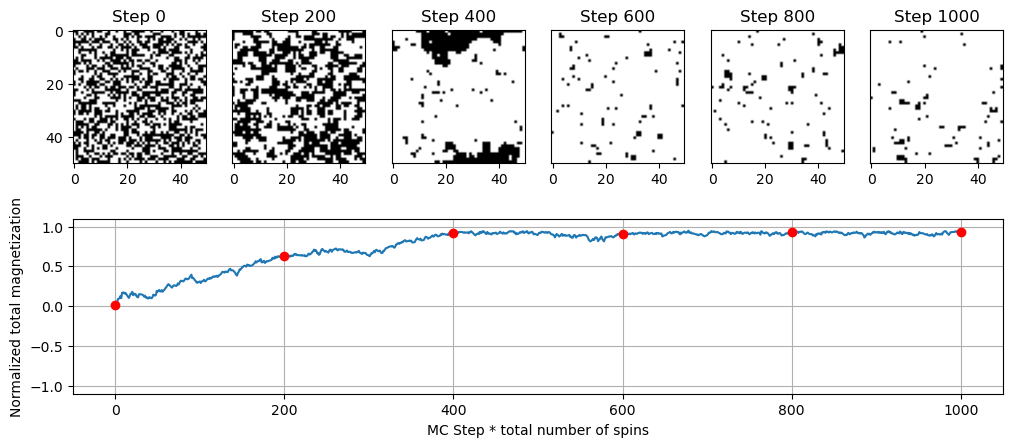

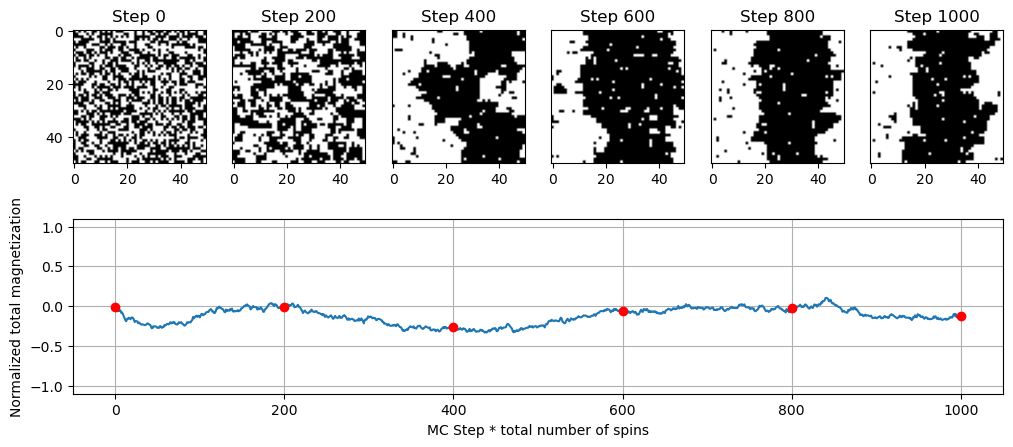

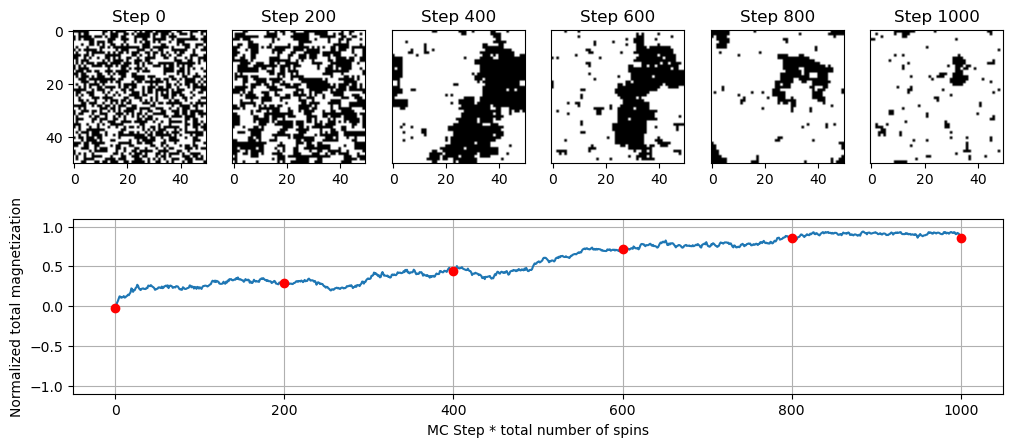

In [ ]:
# Control variable
temperature = 2.0

# Independent runs
several=5
for _ in range(several):
    # Run the Monte Carlo simulation
    system = Ising2D(size, temperature, coupling)
    for step in range(num_steps):
        system.monte_carlo_step()
        if step % snapshot_interval == 0:
            system.snapshots.append(system.lattice.copy())
    # Plot the result
    plot_evolution(system, snapshot_interval)

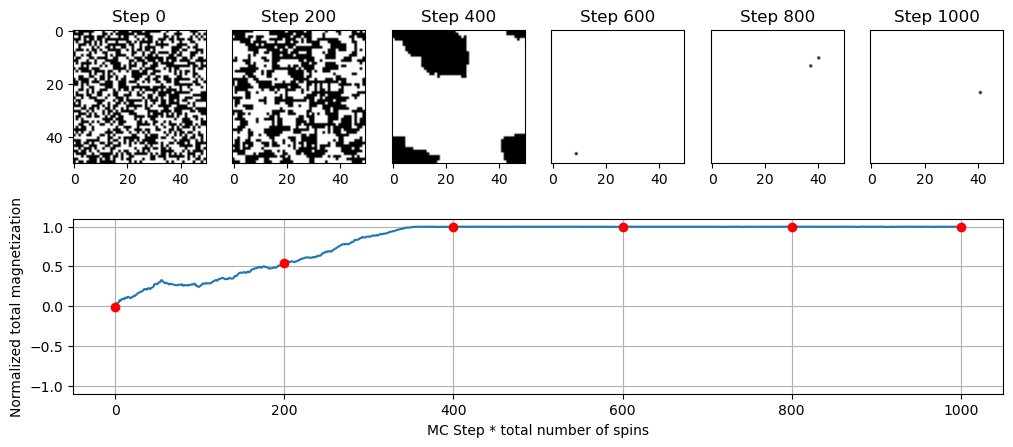

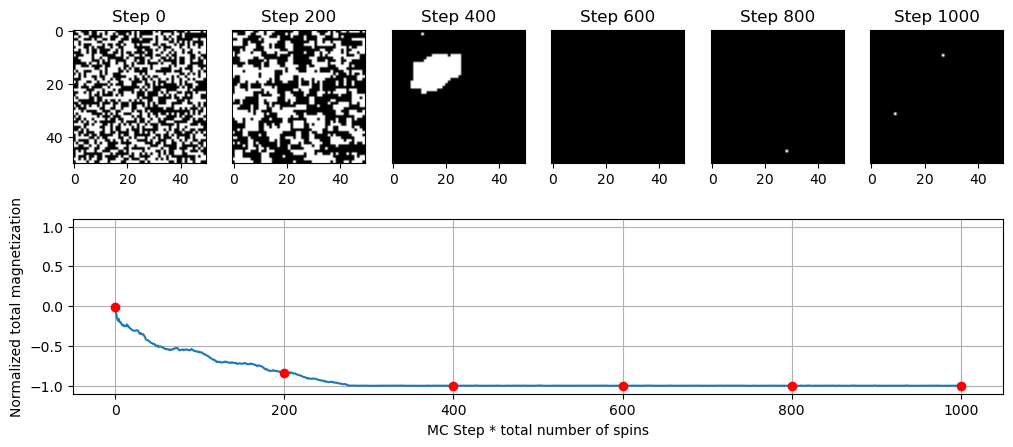

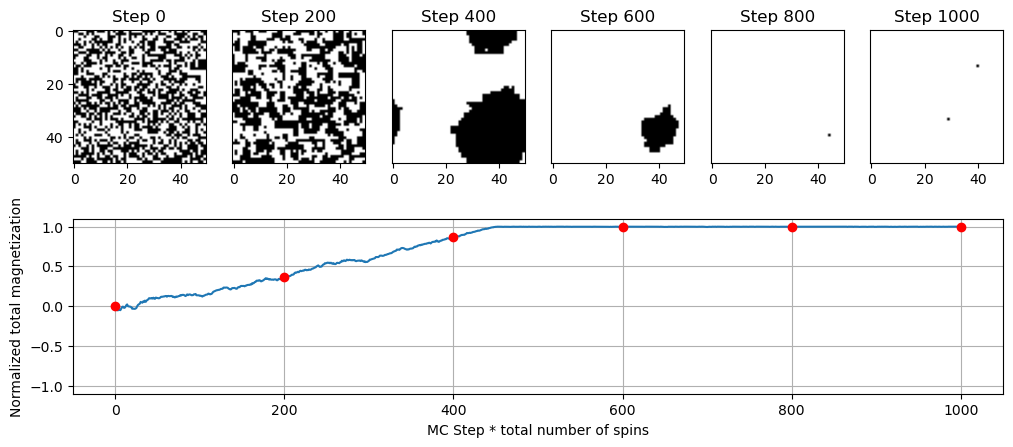

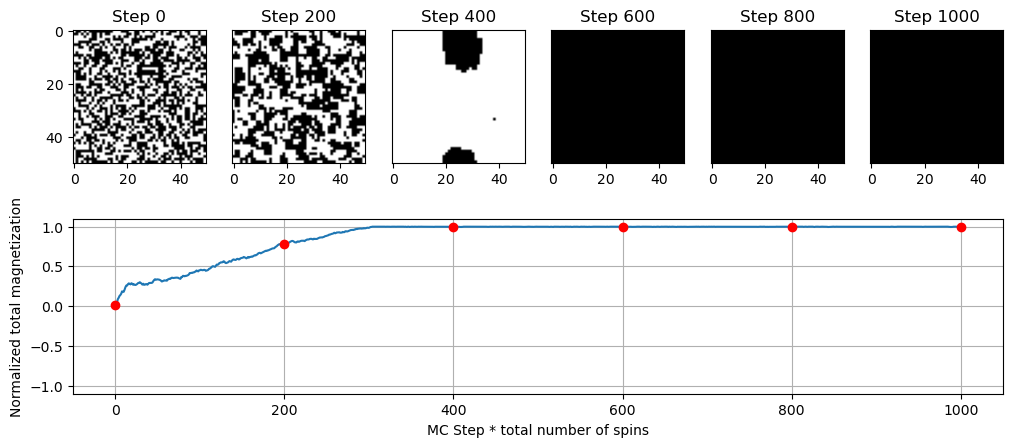

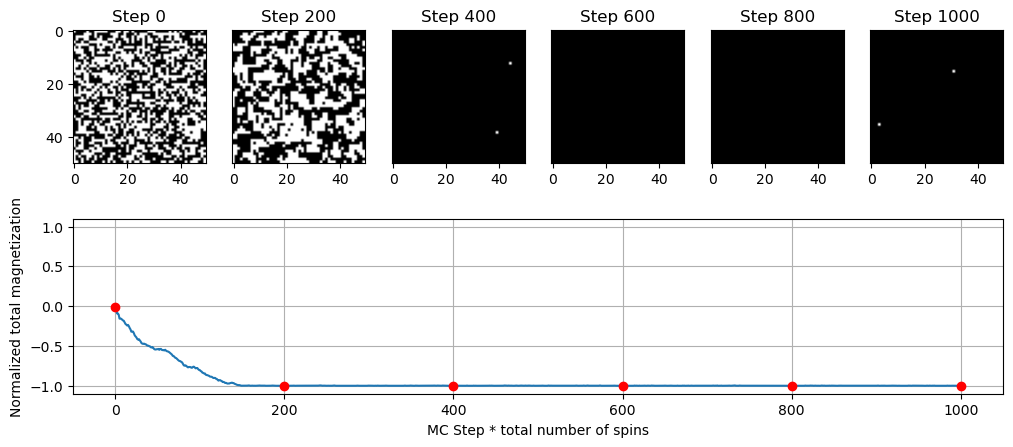

In [ ]:
# Control variable
temperature = 1.0

# Independent runs
several=5
for _ in range(several):
    # Run the Monte Carlo simulation
    system = Ising2D(size, temperature, coupling)
    for step in range(num_steps):
        system.monte_carlo_step()
        if step % snapshot_interval == 0:
            system.snapshots.append(system.lattice.copy())
    # Plot the result
    plot_evolution(system, snapshot_interval)

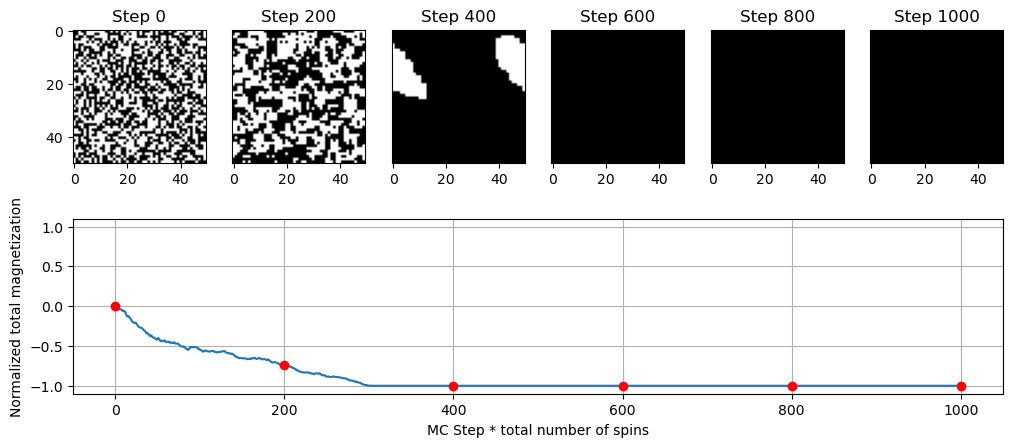

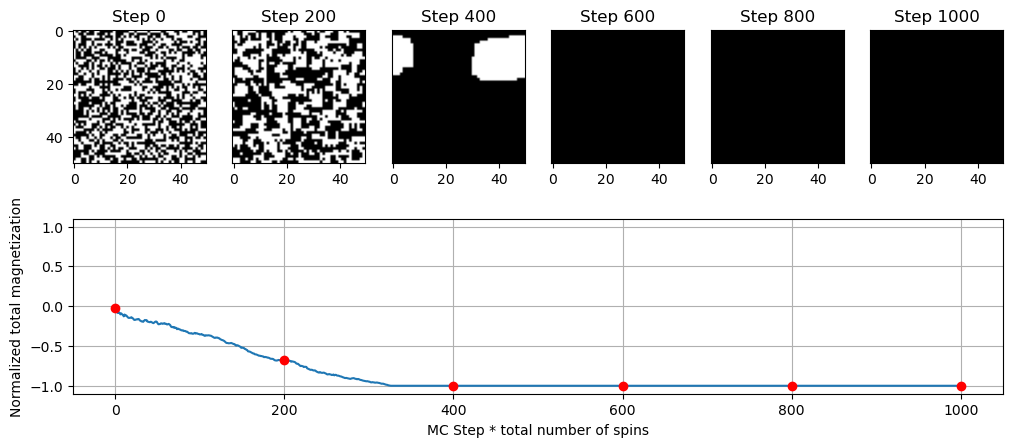

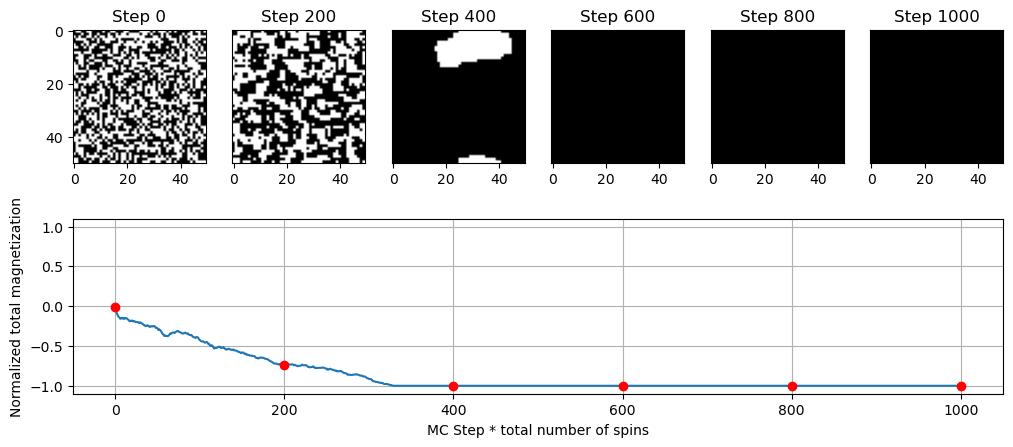

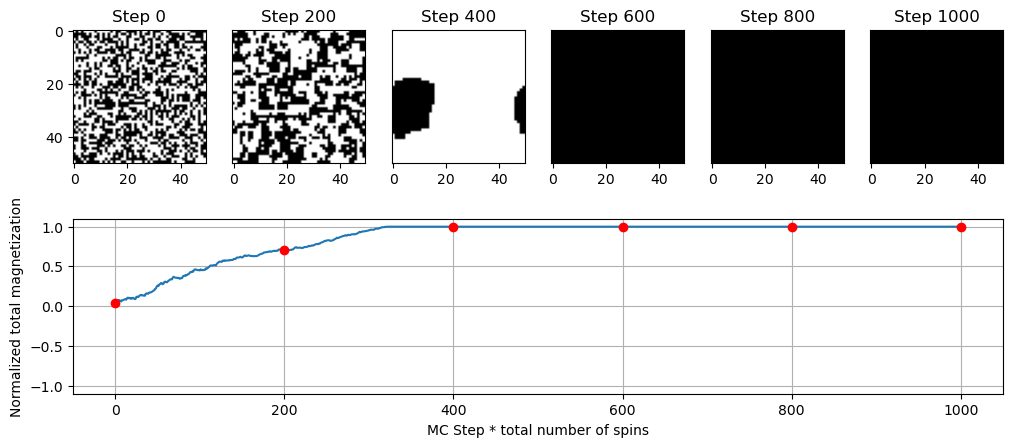

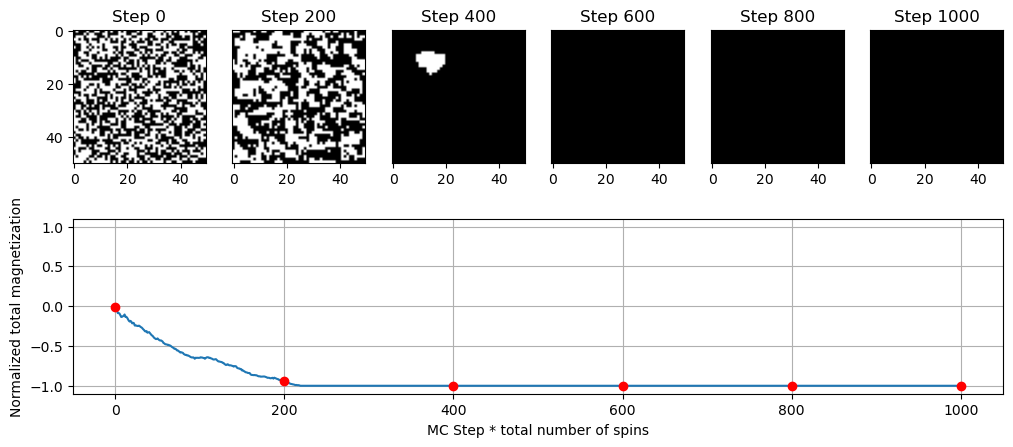

In [ ]:
# Control variable
temperature = 0.5

# Independent runs
several=5
for _ in range(several):
    # Run the Monte Carlo simulation
    system = Ising2D(size, temperature, coupling)
    for step in range(num_steps):
        system.monte_carlo_step()
        if step % snapshot_interval == 0:
            system.snapshots.append(system.lattice.copy())
    # Plot the result
    plot_evolution(system, snapshot_interval)